# importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load dataset

In [5]:
names_df = pd.read_excel('Names.xlsx')
medical_examinations_df = pd.read_csv('Medical Examinations.csv')
hospitalisation_details_df = pd.read_csv('Hospitalisation details.csv')

In [7]:
names_df.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [9]:
medical_examinations_df.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [11]:
hospitalisation_details_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [13]:
names_df.isnull().sum()

Customer ID    0
name           0
dtype: int64

In [15]:
hospitalisation_details_df.isnull().sum()

Customer ID      0
year             0
month            0
date             0
children         0
charges          0
Hospital tier    0
City tier        0
State ID         0
dtype: int64

In [17]:
medical_examinations_df.isnull().sum()

Customer ID               0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64

In [19]:
merged_df = pd.merge(names_df,medical_examinations_df,on='Customer ID')
merged_df = pd.merge(merged_df,hospitalisation_details_df,on='Customer ID')

In [21]:
merged_df.head()

,Customer ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,"Hawks, Ms. Kelly",47.410,7.47,No,No,No,No major surgery,yes,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
2,Id3,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
3,Id4,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
4,Id5,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012


In [23]:
trivial_rows = merged_df.isin(['?']).sum()

In [25]:
trivial_rows

Customer ID               0
name                      0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    2
year                      2
month                     3
date                      0
children                  0
charges                   0
Hospital tier             1
City tier                 1
State ID                  2
dtype: int64

In [27]:
# Calculating the percentage of rows that have trivial values
total_rows = merged_df.shape[0]
trivial_percentage = (trivial_rows / total_rows) * 100

In [29]:
# Finding and removing rows with trivial values if they do not contain significant information
columns_with_trivial = trivial_rows[trivial_rows > 0].index
rows_with_trivial = merged_df[merged_df[columns_with_trivial].isin(['?']).any(axis=1)]
rows_to_delete = rows_with_trivial.index

In [31]:
# Removing the rows with trivial values
cleaned_df = merged_df.drop(rows_to_delete)

In [33]:
# Displaying the trivial value statistics
trivial_value_stats = pd.DataFrame({
    'Trivial Values': trivial_rows,
    'Percentage of Trivial Rows': trivial_percentage
})

In [35]:
trivial_value_stats 

,Trivial Values,Percentage of Trivial Rows
Customer ID,0,0.000000
name,0,0.000000
BMI,0,0.000000
HBA1C,0,0.000000
Heart Issues,0,0.000000
Any Transplants,0,0.000000
Cancer history,0,0.000000
NumberOfMajorSurgeries,0,0.000000
smoker,2,0.085653
year,2,0.085653


In [37]:
cleaned_df

,Customer ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id1,"Hawks, Ms. Kelly",47.410,7.47,No,No,No,No major surgery,yes,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013
1,Id2,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013
3,Id4,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
4,Id5,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012
5,Id6,"Baker, Mr. Russell B.",32.800,6.59,No,No,No,No major surgery,yes,1962,Aug,4,0,52590.83,tier - 1,tier - 3,R1011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id2331,"Brietzke, Mr. Jordan",22.340,5.57,No,No,No,1,No,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,No,No,No,1,No,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
2332,Id2333,"Albano, Ms. Julie",16.470,6.35,No,No,Yes,1,No,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
2333,Id2334,"Rosendahl, Mr. Evan P",17.600,4.39,No,No,No,1,No,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013


In [39]:
# Display unique values in the 'month' column to identify non-numeric entries
unique_months = cleaned_df['month'].unique()

unique_months

array(['Oct', 'Jun', 'Aug', 'Sep', 'Dec', 'Jul', 'Nov'], dtype=object)

In [44]:
# Creating the month mapping
month_mapping = {
    'Jun':6,'Jul':7,'Aug':8, 'Sep':9,'Oct':10,'Nov':11,'Dec':12
}

# Applying the month mapping to the 'month' column
cleaned_df['month'] = cleaned_df['month'].map(month_mapping)

In [46]:
cleaned_df['month'].head()

0    10
1     6
3     6
4     6
5     8
Name: month, dtype: int64

In [48]:
#Age appears to be a significant factor in this analysis. Calculate the patients' ages based on theirdates of birth
cleaned_df['year'] = pd.to_numeric(cleaned_df['year'], errors='coerce')
cleaned_df['month'] = pd.to_numeric(cleaned_df['month'], errors='coerce')
cleaned_df['date'] = pd.to_numeric(cleaned_df['date'], errors='coerce')

# Convert the corrected date components to a proper date format
cleaned_df['birth_date'] = pd.to_datetime(cleaned_df[['year', 'month', 'date']].dropna().rename(columns={'year': 'year', 'month': 'month', 'date': 'day'}), errors='coerce')

# Recalculate age
cleaned_df['age'] = (pd.to_datetime('today') - cleaned_df['birth_date']).dt.days // 365

# Drop the intermediate date columns
cleaned_df.drop(columns=['year', 'month', 'date', 'birth_date'], inplace=True)

In [50]:
# Handling categorical variables
# Ordinal Encoding for Hospital tier and City tier
hospital_tier_mapping = {'tier - 1': 1, 'tier - 2': 2, 'tier - 3': 3}
city_tier_mapping = {'tier - 1': 1, 'tier - 2': 2, 'tier - 3': 3}

cleaned_df['Hospital tier'] = cleaned_df['Hospital tier'].map(hospital_tier_mapping)
cleaned_df['City tier'] = cleaned_df['City tier'].map(city_tier_mapping)

In [52]:
# Getting Unique State ID 
cleaned_df['State ID'].unique()

array(['R1013', 'R1024', 'R1012', 'R1011', 'R1016', 'R1015', 'R1017',
       'R1014', 'R1023', 'R1019', 'R1018', 'R1026', 'R1022', 'R1021',
       'R1025', 'R1020'], dtype=object)

In [54]:
# One-Hot Encoding for categorical variables including all categories for State ID
encoded_df = pd.get_dummies(cleaned_df, columns=['Heart Issues', 'Any Transplants', 'Cancer history', 'smoker', 'State ID'])

# Display the columns to verify inclusion of all State IDs
encoded_df.columns

Index(['Customer ID', 'name', 'BMI', 'HBA1C', 'NumberOfMajorSurgeries',
       'children', 'charges', 'Hospital tier', 'City tier', 'age',
       'Heart Issues_No', 'Heart Issues_yes', 'Any Transplants_No',
       'Any Transplants_yes', 'Cancer history_No', 'Cancer history_Yes',
       'smoker_No', 'smoker_yes', 'State ID_R1011', 'State ID_R1012',
       'State ID_R1013', 'State ID_R1014', 'State ID_R1015', 'State ID_R1016',
       'State ID_R1017', 'State ID_R1018', 'State ID_R1019', 'State ID_R1020',
       'State ID_R1021', 'State ID_R1022', 'State ID_R1023', 'State ID_R1024',
       'State ID_R1025', 'State ID_R1026'],
      dtype='object')

In [56]:
# Replacing 'No major surgery' with 0
encoded_df['NumberOfMajorSurgeries'] = encoded_df['NumberOfMajorSurgeries'].replace('No major surgery', 0)

# Converting the column to numeric
encoded_df['NumberOfMajorSurgeries'] = pd.to_numeric(encoded_df['NumberOfMajorSurgeries'])

In [58]:
# Function to determine gender based on salutation
def extract_gender(name):
    if 'Mr.' in name:
        return 'Male'
    elif 'Ms.' in name or 'Mrs.' in name:
        return 'Female'
    else:
        return 'Unknown'

# Applying the function to create a new 'gender' column
encoded_df['gender'] = encoded_df['name'].apply(extract_gender)

In [60]:
encoded_df.head()

,Customer ID,name,BMI,HBA1C,NumberOfMajorSurgeries,children,charges,Hospital tier,City tier,age,...,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026,gender
0,Id1,"Hawks, Ms. Kelly",47.410,7.47,0,0,63770.43,1,3,56,...,False,False,False,False,False,False,False,False,False,Female
1,Id2,"Lehner, Mr. Matthew D",30.360,5.77,0,0,62592.87,2,3,47,...,False,False,False,False,False,False,False,False,False,Male
3,Id4,"Osborne, Ms. Kelsey",38.095,6.05,0,1,58571.07,1,3,33,...,False,False,False,False,False,False,True,False,False,Female
4,Id5,"Kadala, Ms. Kristyn",35.530,5.45,0,0,55135.40,1,2,35,...,False,False,False,False,False,False,False,False,False,Female
5,Id6,"Baker, Mr. Russell B.",32.800,6.59,0,0,52590.83,1,3,62,...,False,False,False,False,False,False,False,False,False,Male


In [62]:
# Set up the plotting environment
sns.set(style="whitegrid")

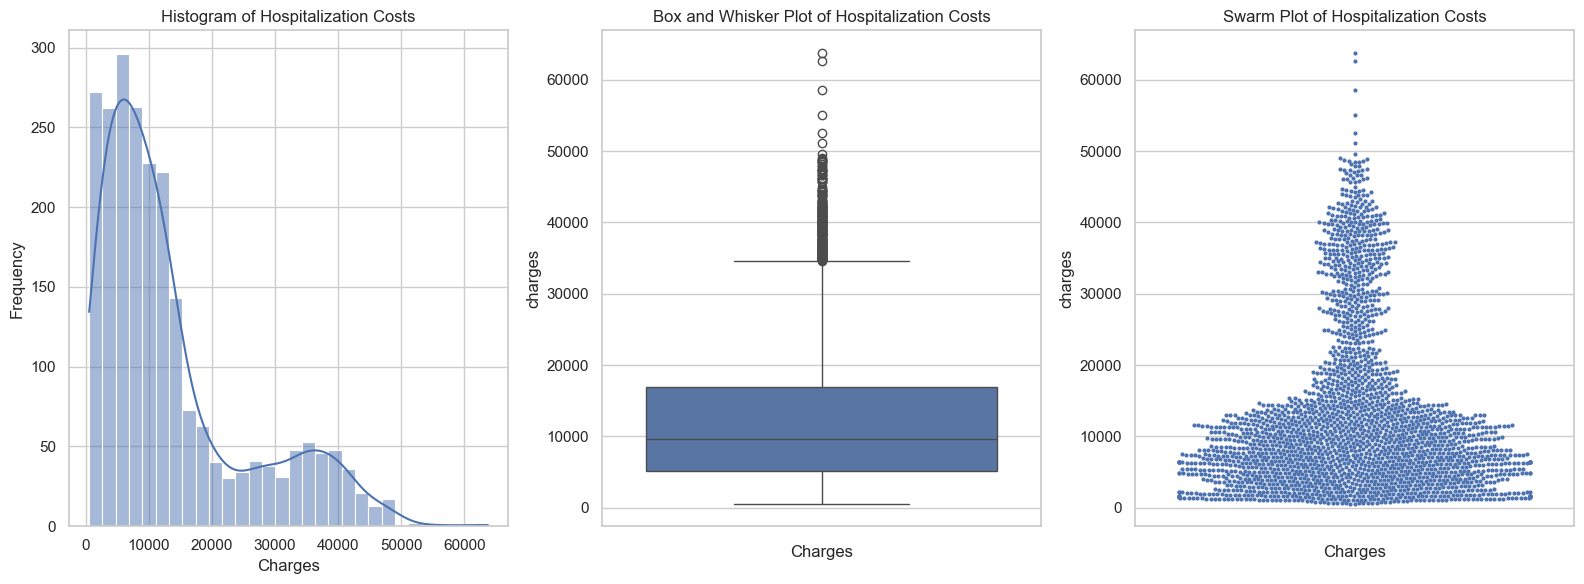

In [64]:
plt.figure(figsize=(16,6))

#Histogram 
plt.subplot(1,3,1)
sns.histplot(encoded_df['charges'],bins=30,kde=True)
plt.title('Histogram of Hospitalization Costs')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Box and Whisker Plot
plt.subplot(1,3,2)
sns.boxplot(y = encoded_df['charges'])
plt.title('Box and Whisker Plot of Hospitalization Costs')
plt.xlabel('Charges')

# Swarm Plot
plt.subplot(1, 3, 3)
sns.swarmplot(y=encoded_df['charges'], size=3)
plt.title('Swarm Plot of Hospitalization Costs')
plt.xlabel('Charges')

plt.tight_layout()
plt.show()

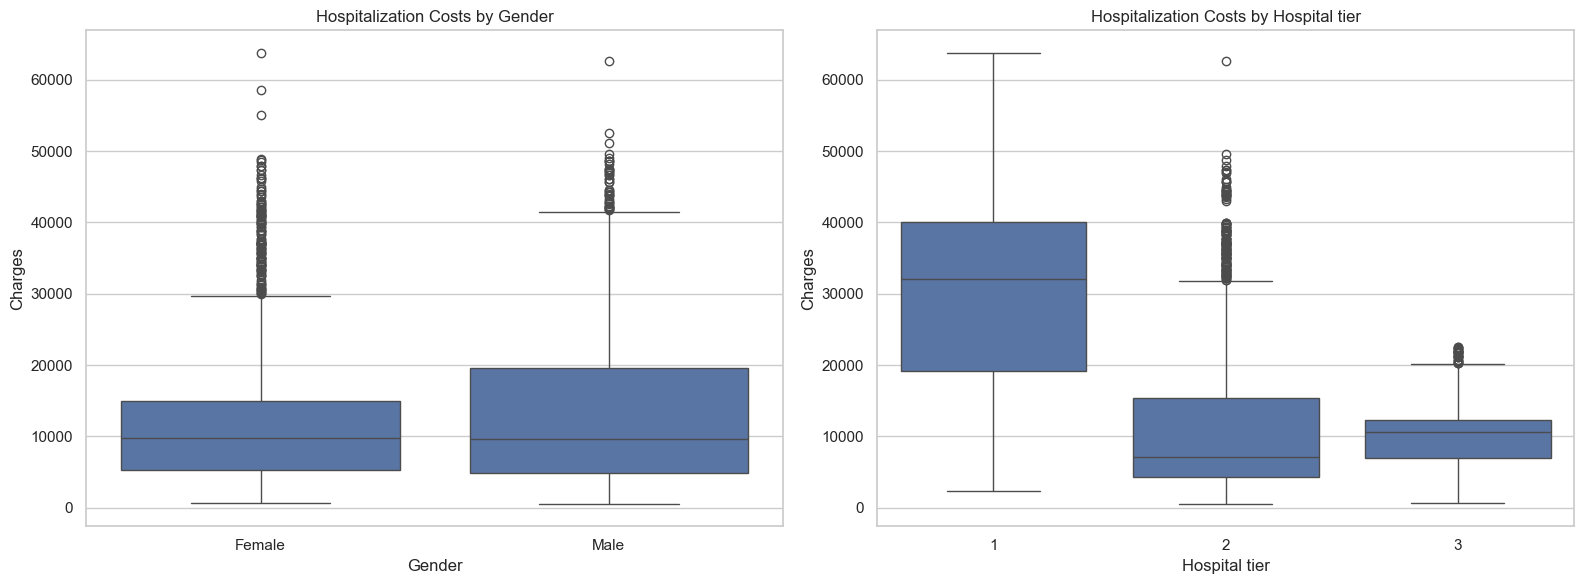

In [65]:
plt.figure(figsize=(16,6))

# Charges by gender
plt.subplot(1,2,1)
sns.boxplot(x='gender',y='charges',data=encoded_df)
plt.title('Hospitalization Costs by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')

# Charges by Hospital Tier
plt.subplot(1,2,2)
sns.boxplot(x='Hospital tier',y='charges',data=encoded_df)
plt.title('Hospitalization Costs by Hospital tier')
plt.xlabel('Hospital tier')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

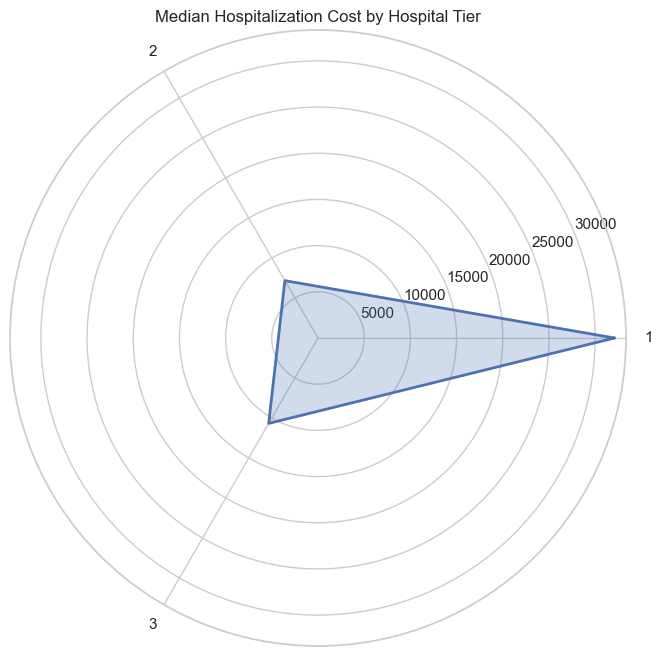

In [66]:
median_charges_by_tier = encoded_df.groupby('Hospital tier')['charges'].median()
categories = list(median_charges_by_tier.index)
values = list(median_charges_by_tier.values)

# Radar Chart
fig, ax = plt.subplots(figsize=(8,8),subplot_kw=dict(polar=True))
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi,num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

ax.fill(angles, values, color='b',alpha=0.25)
ax.plot(angles, values, color='b',linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Median Hospitalization Cost by Hospital Tier')
plt.show()

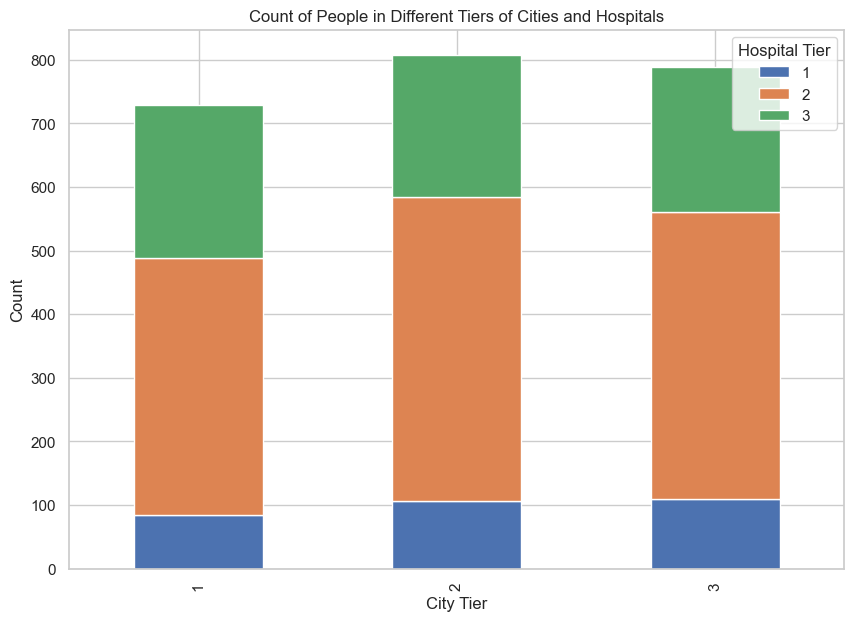

In [67]:
# Frequency table 
frequency_table = pd.crosstab(encoded_df['City tier'],encoded_df['Hospital tier'])

#Stacked Bar Chart
frequency_table.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Count of People in Different Tiers of Cities and Hospitals')
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.legend(title='Hospital Tier')
plt.show()

#  Null Hypothesis Testing

In [69]:
import scipy.stats as stats

# Filter out rows with 'Unknown' in 'Hospital tier'
valid_hospital_data = encoded_df[encoded_df['Hospital tier'] != 'Unknown']

# Perform ANOVA 
anova_result_hospital = stats.f_oneway(
    valid_hospital_data[valid_hospital_data['Hospital tier'] == 1]['charges'],
    valid_hospital_data[valid_hospital_data['Hospital tier'] == 2]['charges'],
    valid_hospital_data[valid_hospital_data['Hospital tier'] == 3]['charges']
)

anova_result_hospital.pvalue

1.7738221310855688e-179

In [70]:
# Filter out rows with 'Unknown' in 'City tier'
valid_city_data = encoded_df[encoded_df['City tier'] != 'Unknown']

# Perform ANOVA
anova_result_city = stats.f_oneway(
    valid_city_data[valid_city_data['City tier'] == 1]['charges'],
    valid_city_data[valid_city_data['City tier'] == 2]['charges'],
    valid_city_data[valid_city_data['City tier'] == 3]['charges']
)

anova_result_city.pvalue

0.23376344386881315

In [71]:
# Perform t-test
t_test_result_smoking = stats.ttest_ind(
    cleaned_df[cleaned_df['smoker'] == 'yes']['charges'],
    cleaned_df[cleaned_df['smoker'] == 'No']['charges']

)

t_test_result_smoking.pvalue

0.0

In [72]:
# Create a contingency table
contingency_table = pd.crosstab(encoded_df['smoker_yes'], encoded_df['Heart Issues_yes'])

# Perform Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

p

0.7694797581780767

In [73]:
# Display results
print("ANOVA Hospital Tiers p-value:", anova_result_hospital.pvalue)
print("ANOVA City Tiers p-value:", anova_result_city.pvalue)
print("t-test Smokers vs Nonsmokers p-value:", t_test_result_smoking.pvalue)
print("Chi-Square Smoking and Heart Issues p-value:", p)

ANOVA Hospital Tiers p-value: 1.7738221310855688e-179
ANOVA City Tiers p-value: 0.23376344386881315
t-test Smokers vs Nonsmokers p-value: 0.0
Chi-Square Smoking and Heart Issues p-value: 0.7694797581780767


#  Machine learning

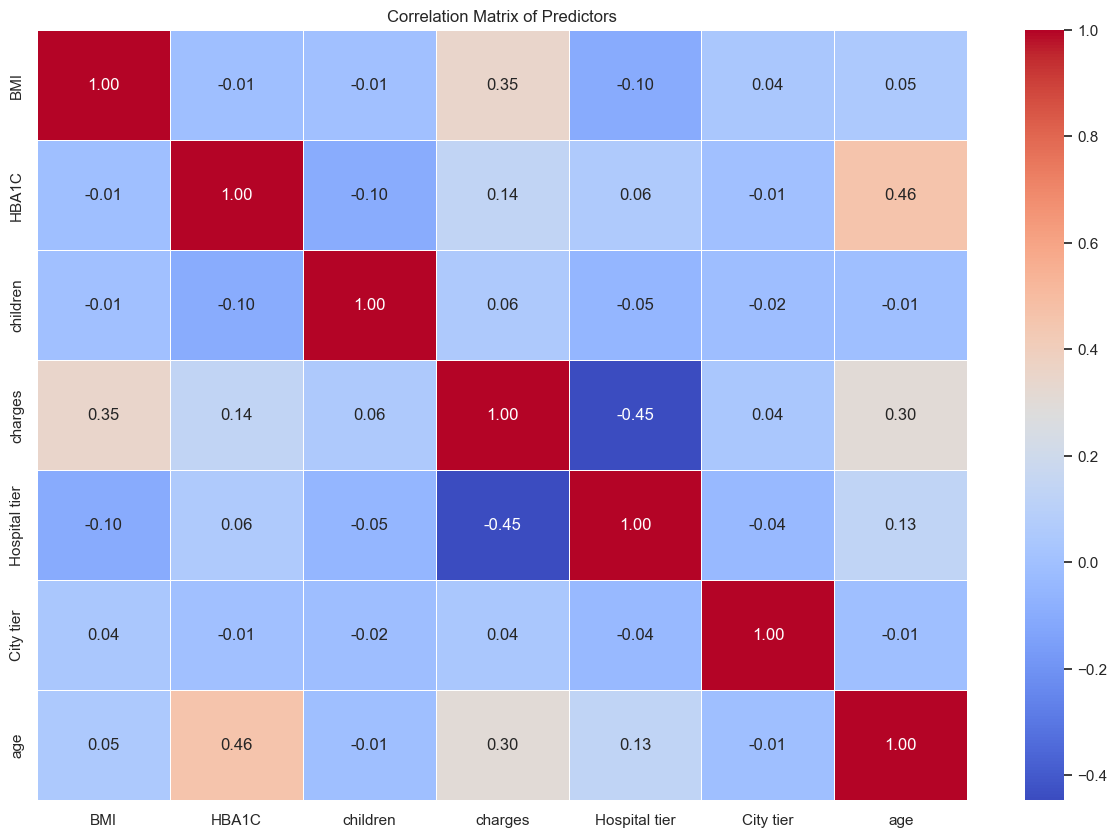

In [75]:
# Compute the correlation matrix
corr_matrix = cleaned_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f',cbar=True)
plt.title('Correlation Matrix of Predictors')
plt.show()

# Model Building

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
# Data Splitting
X = encoded_df.drop(columns=['charges','Customer ID','name','gender'])
y = encoded_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Data Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [80]:
# Model Development and Evaluation
# Linear Regression
linear_model = LinearRegression()
linear_scores = cross_val_score(linear_model, X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
linear_rmse_scores = (-linear_scores)** 0.5

print("Linear Regression RMSE scores : ", linear_rmse_scores)
print("Linear Regression Mean RMSE: ", linear_rmse_scores.mean())


Linear Regression RMSE scores :  [4595.23886862 4183.23902182 4887.97491771 3864.98725197 4754.94620926]
Linear Regression Mean RMSE:  4457.277253876596


In [81]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression Model with hyperParameter Tuning 
ridge = Ridge()
param_grid = {'alpha': [0.1,1,10,100]}
ridge_search = GridSearchCV(ridge,param_grid,cv=5,scoring='neg_mean_squared_error')
ridge_search.fit(X_train_scaled,y_train)
ridge_best = ridge_search.best_estimator_
ridge_scores = cross_val_score(ridge_best, X_train_scaled,y_train,cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = (-ridge_scores)** 0.5


print("Ridge Regression RMSE scores :", ridge_rmse_scores)
print("Ridge Regression Mean RMSE :", ridge_rmse_scores.mean())

Ridge Regression RMSE scores : [4580.68129293 4180.7965512  4894.24558844 3862.41008844 4753.90623401]
Ridge Regression Mean RMSE : 4454.407951002342


In [82]:
# Gradient Boosting 
gboost = GradientBoostingRegressor()
gboost_scores = cross_val_score(gboost, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
gboost_rmse_scores = (-gboost_scores) ** 0.5

# Fitting the model to get feature importance 
gboost.fit(X_train_scaled, y_train)
feature_importances = gboost.feature_importances_

print("Gradient Boosting RMSE Scores :", gboost_rmse_scores)
print("Gradient Boosting Mean RMSE :", gboost_rmse_scores.mean())

Gradient Boosting RMSE Scores : [3670.01282064 3271.43758091 3871.12394001 2695.83761951 3972.69961279]
Gradient Boosting Mean RMSE : 3496.2223147714044


In [83]:
# Displaying Feature Importances
feature_importances_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : feature_importances
}).sort_values(by='Importance',ascending=False)

print("Feature Importances:")
print(feature_importances_df)

Feature Importances:
                   Feature  Importance
13               smoker_No    0.456630
14              smoker_yes    0.296007
0                      BMI    0.114307
6                      age    0.087777
4            Hospital tier    0.020167
3                 children    0.006899
15          State ID_R1011    0.006650
1                    HBA1C    0.003781
17          State ID_R1013    0.003514
22          State ID_R1018    0.001061
30          State ID_R1026    0.001012
28          State ID_R1024    0.000789
19          State ID_R1015    0.000444
18          State ID_R1014    0.000365
2   NumberOfMajorSurgeries    0.000119
7          Heart Issues_No    0.000108
20          State ID_R1016    0.000089
12      Cancer history_Yes    0.000081
25          State ID_R1021    0.000080
26          State ID_R1022    0.000033
21          State ID_R1017    0.000029
27          State ID_R1023    0.000022
5                City tier    0.000012
29          State ID_R1025    0.000008
16  

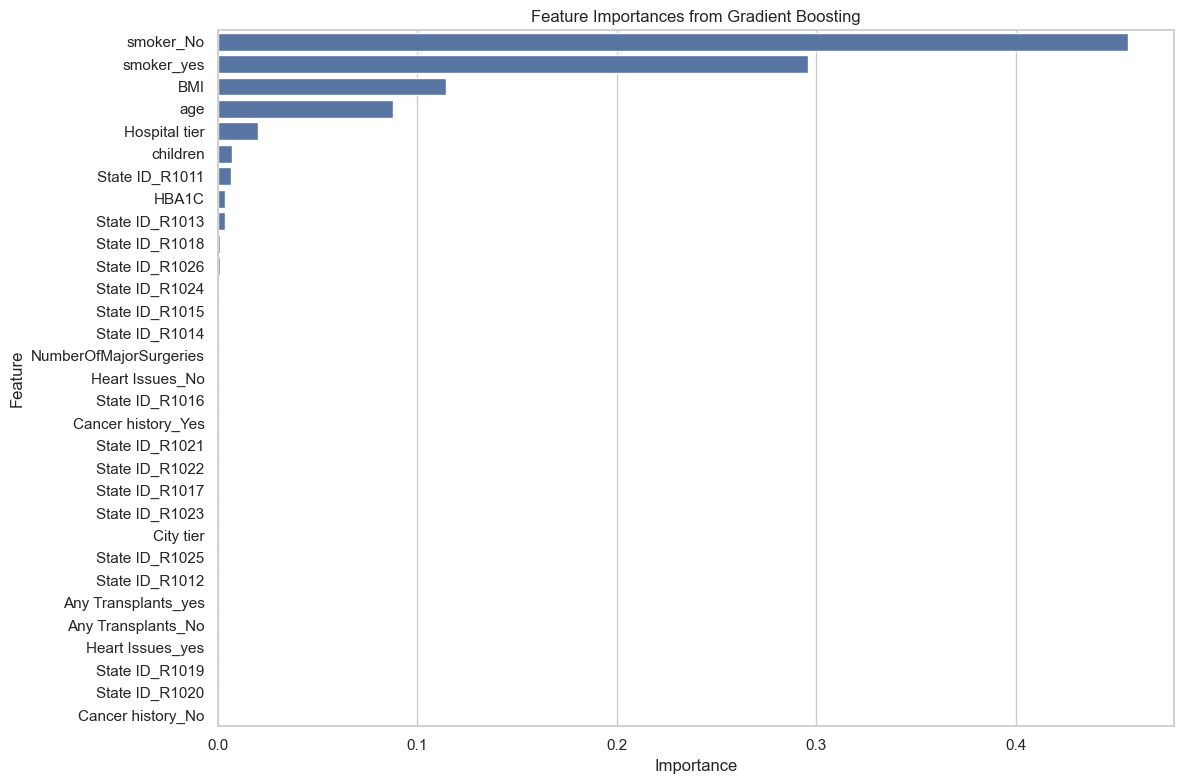

In [84]:
# Plotting the feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y= 'Feature' , data = feature_importances_df )
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [85]:
# Prdictions on test Data
ridge_best.fit(X_train_scaled,y_train)
ypred = ridge_best.predict(X_test_scaled)

In [86]:
# Calculate Residuals
residuals = y_test - ypred

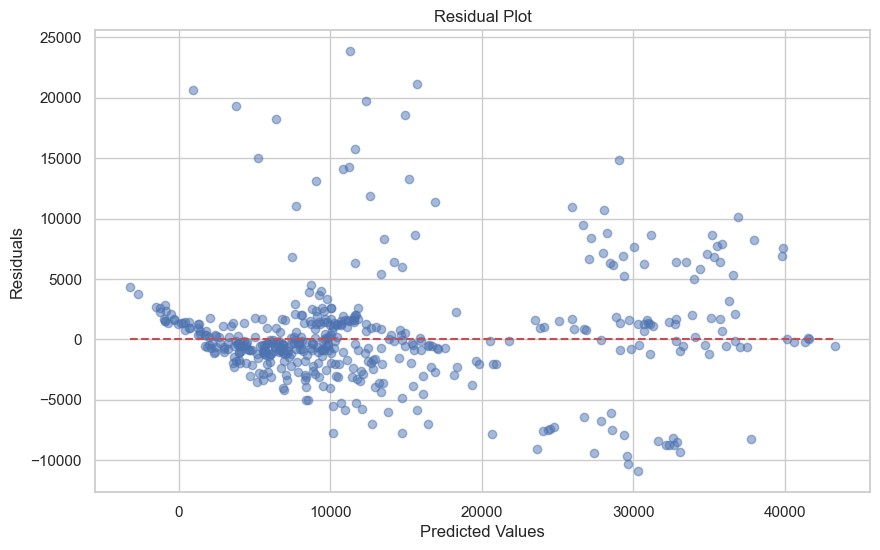

In [87]:
# Residual plot 
plt.figure(figsize=(10,6))
plt.scatter(ypred, residuals,alpha=0.5)
plt.hlines(0, xmin = min(ypred), xmax= max(ypred), colors='r',linestyles='dashed')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

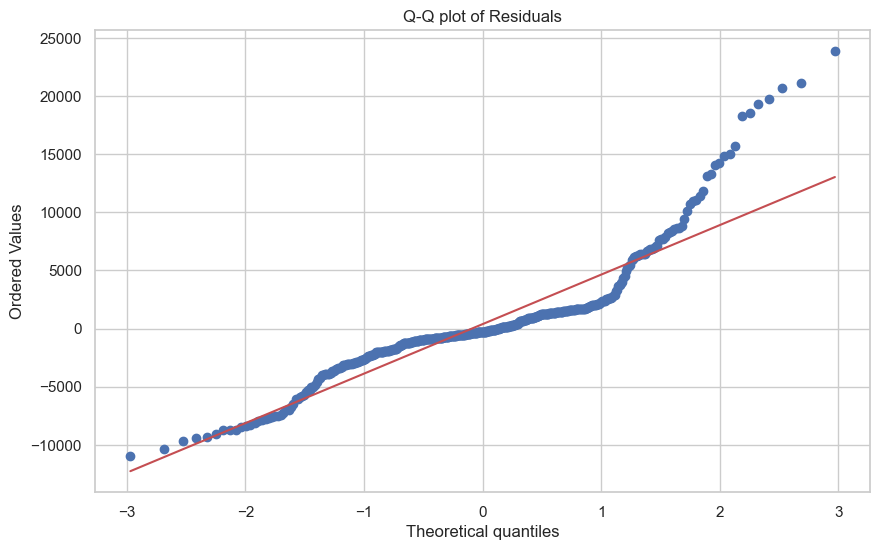

In [88]:
# Q-Q Plot
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q plot of Residuals')
plt.show()

In [89]:
jayna_data = {
    'BMI': [85 / (1.70 ** 2)],  # BMI calculation: weight (kg) / height (m^2)
    'HBA1C': [5.8],
    'NumberOfMajorSurgeries': [1],  # Assuming no major surgeries
    'children' : [2],
    'Hospital tier': [1],
    'City tier': [1],
    'age': [2024 - 1988],  # Calculating age in 2024
    'Heart Issues_No' : [1],
    'Heart Issues_yes': [0],
    'Any Transplants_No' : [1],
    'Any Transplants_yes': [0],
    'Cancer history_No' : [0],
    'Cancer history_Yes': [1],
    'smoker_No' : [0],
    'smoker_yes': [1],
    'State ID_R1011': [1],
    'State ID_R1012': [0],
    'State ID_R1013': [0],
    # Fill in other State ID columns with 0
    'State ID_R1014': [0],
    'State ID_R1015': [0],
    'State ID_R1016': [0],
    'State ID_R1017': [0],
    'State ID_R1018': [0],
    'State ID_R1019': [0],
    'State ID_R1020': [0],
    'State ID_R1021': [0],
    'State ID_R1022': [0],
    'State ID_R1023': [0],
    'State ID_R1024': [0],
    'State ID_R1025': [0],
    'State ID_R1026': [0],
    
    
}

# Convert to DataFrame
jayna_df = pd.DataFrame(jayna_data)

In [90]:
jayna_df

,BMI,HBA1C,NumberOfMajorSurgeries,children,Hospital tier,City tier,age,Heart Issues_No,Heart Issues_yes,Any Transplants_No,...,State ID_R1017,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026
0,29.411765,5.8,1,2,1,1,36,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Standardize the features
jayna_scaled = scaler.transform(jayna_df)

In [92]:
# Predict the cost for Ms. Jayna with Linear Regression model
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(jayna_scaled)
print(f"Estimated hospitalization cost for Ms. Jayna using Linear Regression: ${linear_pred[0]:,.2f}")

Estimated hospitalization cost for Ms. Jayna using Linear Regression: $160,068,087,485,607.19


In [93]:
# Predict the cost for Ms. Jayna with Ridge Regression
jayna_cost_prediction = ridge_best.predict(jayna_scaled)

print(f"Estimated hospitalization cost for Ms. Jayna with Ridge Regression : ${jayna_cost_prediction[0]:,.2f}")

Estimated hospitalization cost for Ms. Jayna with Ridge Regression : $31,183.29


In [94]:
# Predict the cost for Ms. Jayna with Gradient Boosting 
gboost_pred = gboost.predict(jayna_scaled)
print(f"Estimated hospitalization cost for Ms. Jayna using Gradient Boosting: ${gboost_pred[0]:,.2f}")

Estimated hospitalization cost for Ms. Jayna using Gradient Boosting: $26,981.05


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predict on the test set using Ridge Regression
ridge_test_pred = ridge_best.predict(X_test_scaled)

# Predict on the test ste using gradient boosting
gboost_test_pred = gboost.predict(X_test_scaled)
# Evaluate Ridge Regression performance
ridge_rmse = mean_squared_error(y_test, ridge_test_pred, squared=False)
ridge_mae = mean_absolute_error(y_test,ridge_test_pred)
ridge_r2 = r2_score(y_test, ridge_test_pred)

print("Ridge Regression Performance on Test Data:")
print(f"RMSE : {ridge_rmse: .2f}")
print(f"MAE: {ridge_mae:.2f}")
print(f"R²: {ridge_r2:.2f}")

Ridge Regression Performance on Test Data:
RMSE :  4622.37
MAE: 2841.54
R²: 0.85


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [131]:
# Evaluate Gradient Boosting performance
gboost_rmse = mean_squared_error(y_test, gboost_test_pred, squared=False)
gboost_mae = mean_absolute_error(y_test, gboost_test_pred)
gboost_r2 = r2_score(y_test, gboost_test_pred)

print("Gradient Boosting Performance on Test Data:")
print(f"RMSE: {gboost_rmse:.2f}")
print(f"MAE: {gboost_mae:.2f}")
print(f"R²: {gboost_r2:.2f}")

Gradient Boosting Performance on Test Data:
RMSE: 3851.73
MAE: 2152.59
R²: 0.89


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
